Confusion Matrix:
[[73  6]
 [ 4 37]]
Accuracy: 0.9166666666666666


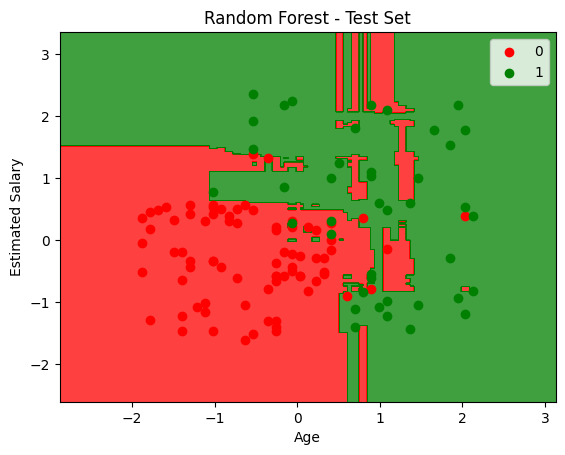

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Download the dataset
dataset = pd.read_csv('Social_Network_Ads(3).csv')

# Step 2: Select independent variables
X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']

# Step 3: Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split the dataset into the Training set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 5: Build the Random Forest model
classifier = RandomForestClassifier(n_estimators=12, random_state=0)
classifier.fit(X_train, y_train)

# Step 6: Confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

# Step 7: Visualize the Random Forest 
x1, x2 = np.meshgrid(np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c=['red', 'green'][i], label=j)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Random Forest - Test Set')
plt.legend()
plt.show()




Step 8: Comparison with SVM from Lab 5


in my opinion The SVM model achieved a higher accuracy of 0.93 compared to the Random Forest model's accuracy of 0.917. Both models performed reasonably well in predicting the buyers of the new mobile phone, with SVM slightly outperforming Random Forest.